In this notebook I'll reconstruct the process and results of the DTCR algorithm presented in the "Learning Representations for Time Series Clustering".

In [1]:
# Imports
import torch
from torch.utils.data import DataLoader
from Utilities.DTCR import DTCRModel, DTCRConfig
from Utilities.UCRParser import read_dataset

In [2]:
testing_dataset = "SonyAIBORobotSurface"
train_ds, test_ds = read_dataset(testing_dataset)

config = DTCRConfig()
config.class_num = train_ds.number_of_labels
config.input_size = train_ds[0][0].shape[1]
config.num_steps = train_ds[0][0].shape[0]
config.model_name = testing_dataset
config.batch_size = len(train_ds)

config.learning_rate = 5e-3
config.checkpoint_interval = 50
config.hidden_size = [50, 30, 30]
config.dilations = [1, 4, 16]
config.coefficient_lambda = 0.1

train_dl = DataLoader(train_ds, batch_size=config.batch_size, shuffle=True, drop_last=True)
test_dl = DataLoader(test_ds, batch_size=len(test_ds), shuffle=True)

Loading the SonyAIBORobotSurface dataset...
The dataset SonyAIBORobotSurface was loaded.


In [3]:
dtcr_model = DTCRModel(config)
dtcr_model

DTCRModel(
  (encoder): BidirectionalDRNN(
    (_regular_drnn): DRNN(
      (_layers): ModuleList(
        (0): GRU(1, 50, batch_first=True)
        (1): GRU(50, 30, batch_first=True)
        (2): GRU(30, 30, batch_first=True)
      )
    )
    (_backwards_drnn): DRNN(
      (_layers): ModuleList(
        (0): GRU(1, 50, batch_first=True)
        (1): GRU(50, 30, batch_first=True)
        (2): GRU(30, 30, batch_first=True)
      )
    )
  )
  (decoder): DTCRDecoder(
    (_rnn): GRU(220, 220, batch_first=True)
    (_linear): Linear(in_features=220, out_features=1, bias=True)
  )
  (classifier): Sequential(
    (0): Linear(in_features=220, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=2, bias=True)
    (3): Softmax(dim=1)
  )
)

In [4]:
# if you want to continue the training load the model here from the checkpoint
# dtcr_model = torch.load("Checkpoints/ECGFiveDays_900")
recons_criterion = config.decoding_criterion()
classify_criterion = config.classifier_criterion()
optimizer = config.optimizer(dtcr_model.parameters(),
                             eps=config.learning_rate)

Starting epoch 1:
[1|1] loss: 8.5904, classify: 0.69341,recons: 0.99534, clustering: 69.01605
Starting epoch 2:
[2|1] loss: 8.0793, classify: 0.69332,recons: 0.98715, clustering: 63.98833
Starting epoch 3:
[3|1] loss: 7.5806, classify: 0.69320,recons: 0.98158, clustering: 59.05803
Starting epoch 4:
[4|1] loss: 7.1010, classify: 0.69317,recons: 0.97770, clustering: 54.30135
Starting epoch 5:
[5|1] loss: 6.6976, classify: 0.69314,recons: 0.97481, clustering: 50.29705
Starting epoch 6:
[6|1] loss: 6.3316, classify: 0.69313,recons: 0.97242, clustering: 46.66040
Starting epoch 7:
[7|1] loss: 5.9249, classify: 0.69288,recons: 0.97024, clustering: 42.61806
Starting epoch 8:
[8|1] loss: 5.7217, classify: 0.69326,recons: 0.96813, clustering: 40.60275
Starting epoch 9:
[9|1] loss: 5.4542, classify: 0.69282,recons: 0.96601, clustering: 37.95375
Starting epoch 10:
[10|1] loss: 5.1995, classify: 0.69270,recons: 0.96390, clustering: 35.42857
Starting epoch 11:
[11|1] loss: 2.0118, classify: 0.69299,

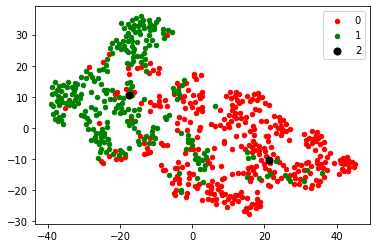

Plot with predicted labels (for kmeans and tsne sanity):


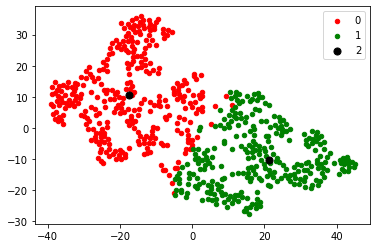

Starting epoch 51:
[51|1] loss: 1.4893, classify: 0.69140,recons: 0.63437, clustering: 1.63500
Starting epoch 52:
[52|1] loss: 1.5470, classify: 0.69211,recons: 0.69340, clustering: 1.61494
Starting epoch 53:
[53|1] loss: 1.4582, classify: 0.69186,recons: 0.61187, clustering: 1.54505
Starting epoch 54:
[54|1] loss: 1.4759, classify: 0.69216,recons: 0.62727, clustering: 1.56449
Starting epoch 55:
[55|1] loss: 1.4909, classify: 0.69196,recons: 0.65010, clustering: 1.48868
Starting epoch 56:
[56|1] loss: 1.4904, classify: 0.69176,recons: 0.65337, clustering: 1.45285
Starting epoch 57:
[57|1] loss: 1.4801, classify: 0.69155,recons: 0.64297, clustering: 1.45618
Starting epoch 58:
[58|1] loss: 1.4632, classify: 0.69177,recons: 0.62518, clustering: 1.46255
Starting epoch 59:
[59|1] loss: 1.4265, classify: 0.69231,recons: 0.60982, clustering: 1.24359
Starting epoch 60:
[60|1] loss: 1.4514, classify: 0.69160,recons: 0.61853, clustering: 1.41276
Starting epoch 61:
[61|1] loss: 1.4679, classify: 

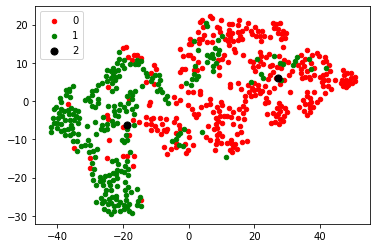

Plot with predicted labels (for kmeans and tsne sanity):


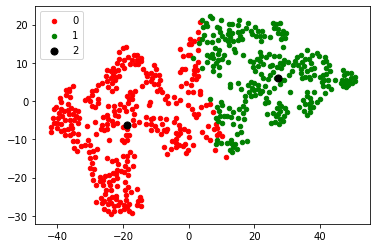

Starting epoch 101:
[101|1] loss: 1.2766, classify: 0.69143,recons: 0.50822, clustering: 0.76925
Starting epoch 102:
[102|1] loss: 1.2773, classify: 0.69337,recons: 0.51295, clustering: 0.70998
Starting epoch 103:
[103|1] loss: 1.2484, classify: 0.69177,recons: 0.48774, clustering: 0.68925
Starting epoch 104:
[104|1] loss: 1.2302, classify: 0.69216,recons: 0.46058, clustering: 0.77483
Starting epoch 105:
[105|1] loss: 1.1923, classify: 0.69157,recons: 0.42540, clustering: 0.75343
Starting epoch 106:
[106|1] loss: 1.1697, classify: 0.69193,recons: 0.40267, clustering: 0.75141
Starting epoch 107:
[107|1] loss: 1.2118, classify: 0.69166,recons: 0.44527, clustering: 0.74920
Starting epoch 108:
[108|1] loss: 1.1778, classify: 0.69185,recons: 0.42288, clustering: 0.63032
Starting epoch 109:
[109|1] loss: 1.2052, classify: 0.69192,recons: 0.44186, clustering: 0.71467
Starting epoch 110:
[110|1] loss: 1.1635, classify: 0.69117,recons: 0.39973, clustering: 0.72625
Starting epoch 111:
[111|1] lo

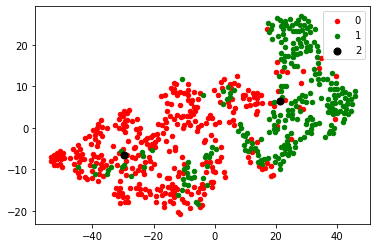

Plot with predicted labels (for kmeans and tsne sanity):


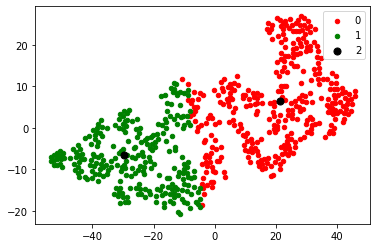

Starting epoch 151:
[151|1] loss: 1.0993, classify: 0.69255,recons: 0.36192, clustering: 0.44850
Starting epoch 152:
[152|1] loss: 1.0983, classify: 0.69245,recons: 0.36134, clustering: 0.44508
Starting epoch 153:
[153|1] loss: 1.0960, classify: 0.69177,recons: 0.36086, clustering: 0.43414
Starting epoch 154:
[154|1] loss: 1.0883, classify: 0.69221,recons: 0.36049, clustering: 0.35624
Starting epoch 155:
[155|1] loss: 1.0920, classify: 0.69159,recons: 0.36015, clustering: 0.40283
Starting epoch 156:
[156|1] loss: 1.0917, classify: 0.69185,recons: 0.35960, clustering: 0.40209
Starting epoch 157:
[157|1] loss: 1.0874, classify: 0.69066,recons: 0.35881, clustering: 0.37959
Starting epoch 158:
[158|1] loss: 1.0850, classify: 0.69155,recons: 0.35859, clustering: 0.34914
Starting epoch 159:
[159|1] loss: 1.0917, classify: 0.69295,recons: 0.35807, clustering: 0.40646
Starting epoch 160:
[160|1] loss: 1.0891, classify: 0.69121,recons: 0.35770, clustering: 0.40199
Starting epoch 161:
[161|1] lo

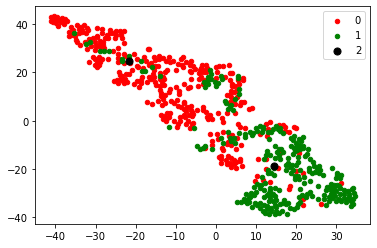

Plot with predicted labels (for kmeans and tsne sanity):


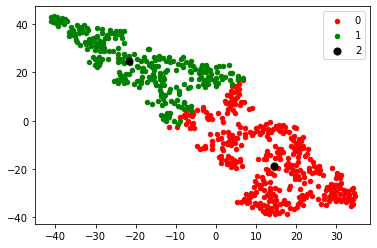

Starting epoch 201:
[201|1] loss: 1.0823, classify: 0.69163,recons: 0.36545, clustering: 0.25212
Starting epoch 202:
[202|1] loss: 1.0726, classify: 0.69194,recons: 0.35556, clustering: 0.25071
Starting epoch 203:
[203|1] loss: 1.0739, classify: 0.69195,recons: 0.35802, clustering: 0.23882
Starting epoch 204:
[204|1] loss: 1.0676, classify: 0.69264,recons: 0.35064, clustering: 0.24334
Starting epoch 205:
[205|1] loss: 1.0735, classify: 0.69228,recons: 0.35732, clustering: 0.23912
Starting epoch 206:
[206|1] loss: 1.0668, classify: 0.69212,recons: 0.35064, clustering: 0.24006
Starting epoch 207:
[207|1] loss: 1.0669, classify: 0.69189,recons: 0.35139, clustering: 0.23639
Starting epoch 208:
[208|1] loss: 1.0634, classify: 0.69236,recons: 0.34781, clustering: 0.23193
Starting epoch 209:
[209|1] loss: 1.0652, classify: 0.69165,recons: 0.35020, clustering: 0.23322
Starting epoch 210:
[210|1] loss: 1.0628, classify: 0.69143,recons: 0.34938, clustering: 0.22031
Starting epoch 211:
[211|1] lo

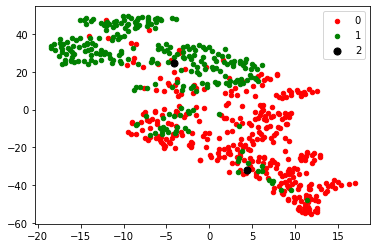

Plot with predicted labels (for kmeans and tsne sanity):


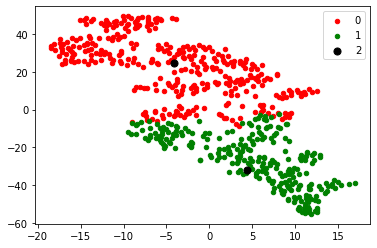

Starting epoch 251:
[251|1] loss: 1.0242, classify: 0.69144,recons: 0.31797, clustering: 0.14824
Starting epoch 252:
[252|1] loss: 1.0241, classify: 0.69281,recons: 0.31747, clustering: 0.13871
Starting epoch 253:
[253|1] loss: 1.0243, classify: 0.69284,recons: 0.31704, clustering: 0.14400
Starting epoch 254:
[254|1] loss: 1.0240, classify: 0.69314,recons: 0.31655, clustering: 0.14347
Starting epoch 255:
[255|1] loss: 1.0222, classify: 0.69206,recons: 0.31606, clustering: 0.14030
Starting epoch 256:
[256|1] loss: 1.0217, classify: 0.69249,recons: 0.31569, clustering: 0.13528
Starting epoch 257:
[257|1] loss: 1.0202, classify: 0.69165,recons: 0.31530, clustering: 0.13281
Starting epoch 258:
[258|1] loss: 1.0216, classify: 0.69315,recons: 0.31481, clustering: 0.13673
Starting epoch 259:
[259|1] loss: 1.0190, classify: 0.69260,recons: 0.31437, clustering: 0.12059
Starting epoch 260:
[260|1] loss: 1.0189, classify: 0.69255,recons: 0.31397, clustering: 0.12423
Starting epoch 261:
[261|1] lo

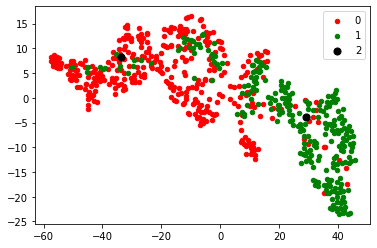

Plot with predicted labels (for kmeans and tsne sanity):


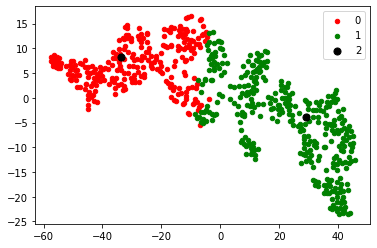

Starting epoch 301:
[301|1] loss: 1.0082, classify: 0.69315,recons: 0.30758, clustering: 0.07472
Starting epoch 302:
[302|1] loss: 1.0043, classify: 0.69214,recons: 0.30440, clustering: 0.07770
Starting epoch 303:
[303|1] loss: 1.0097, classify: 0.69244,recons: 0.30883, clustering: 0.08426
Starting epoch 304:
[304|1] loss: 1.0062, classify: 0.69273,recons: 0.30567, clustering: 0.07758
Starting epoch 305:
[305|1] loss: 1.0008, classify: 0.69180,recons: 0.30135, clustering: 0.07659
Starting epoch 306:
[306|1] loss: 1.0031, classify: 0.69233,recons: 0.30422, clustering: 0.06561
Starting epoch 307:
[307|1] loss: 1.0024, classify: 0.69308,recons: 0.30259, clustering: 0.06710
Starting epoch 308:
[308|1] loss: 1.0015, classify: 0.69304,recons: 0.30065, clustering: 0.07832
Starting epoch 309:
[309|1] loss: 0.9987, classify: 0.69202,recons: 0.30023, clustering: 0.06456
Starting epoch 310:
[310|1] loss: 0.9978, classify: 0.69197,recons: 0.29846, clustering: 0.07367
Starting epoch 311:
[311|1] lo

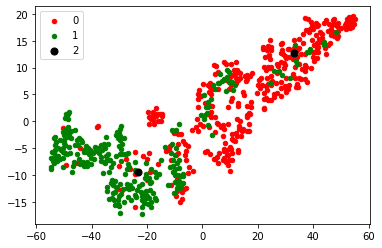

Plot with predicted labels (for kmeans and tsne sanity):


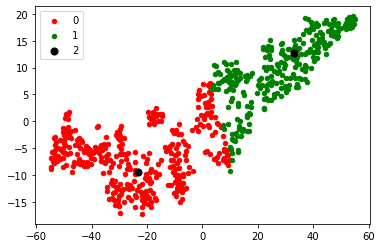

Starting epoch 351:
[351|1] loss: 1.0181, classify: 0.69257,recons: 0.32087, clustering: 0.04630
Starting epoch 352:
[352|1] loss: 1.0093, classify: 0.69257,recons: 0.31179, clustering: 0.04948
Starting epoch 353:
[353|1] loss: 1.0034, classify: 0.69272,recons: 0.30590, clustering: 0.04792
Starting epoch 354:
[354|1] loss: 0.9814, classify: 0.69239,recons: 0.28463, clustering: 0.04373
Starting epoch 355:
[355|1] loss: 0.9754, classify: 0.69250,recons: 0.27815, clustering: 0.04783
Starting epoch 356:
[356|1] loss: 0.9825, classify: 0.69288,recons: 0.28494, clustering: 0.04662
Starting epoch 357:
[357|1] loss: 0.9926, classify: 0.69256,recons: 0.29535, clustering: 0.04659
Starting epoch 358:
[358|1] loss: 1.0023, classify: 0.69245,recons: 0.30541, clustering: 0.04465
Starting epoch 359:
[359|1] loss: 0.9871, classify: 0.69260,recons: 0.28996, clustering: 0.04578
Starting epoch 360:
[360|1] loss: 0.9753, classify: 0.69193,recons: 0.27888, clustering: 0.04526
Starting epoch 361:
[361|1] lo

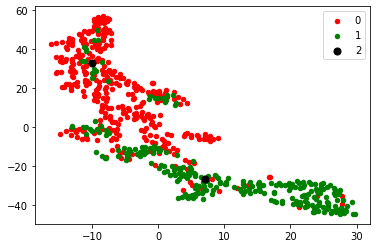

Plot with predicted labels (for kmeans and tsne sanity):


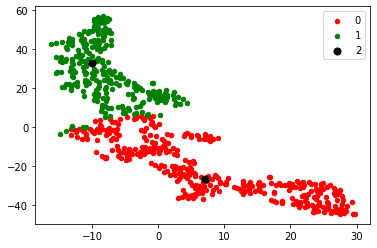

Starting epoch 401:
[401|1] loss: 0.9658, classify: 0.69238,recons: 0.27038, clustering: 0.03017
Starting epoch 402:
[402|1] loss: 0.9651, classify: 0.69230,recons: 0.27009, clustering: 0.02701
Starting epoch 403:
[403|1] loss: 0.9657, classify: 0.69281,recons: 0.26984, clustering: 0.03011
Starting epoch 404:
[404|1] loss: 0.9651, classify: 0.69252,recons: 0.26965, clustering: 0.02956
Starting epoch 405:
[405|1] loss: 0.9648, classify: 0.69236,recons: 0.26952, clustering: 0.02945
Starting epoch 406:
[406|1] loss: 0.9646, classify: 0.69225,recons: 0.26943, clustering: 0.02887
Starting epoch 407:
[407|1] loss: 0.9645, classify: 0.69234,recons: 0.26938, clustering: 0.02730
Starting epoch 408:
[408|1] loss: 0.9649, classify: 0.69316,recons: 0.26936, clustering: 0.02367
Starting epoch 409:
[409|1] loss: 0.9645, classify: 0.69260,recons: 0.26937, clustering: 0.02559
Starting epoch 410:
[410|1] loss: 0.9649, classify: 0.69278,recons: 0.26940, clustering: 0.02710
Starting epoch 411:
[411|1] lo

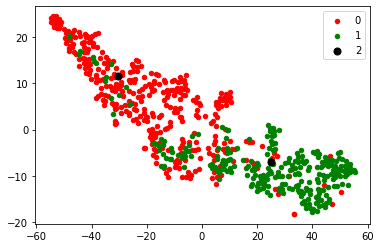

Plot with predicted labels (for kmeans and tsne sanity):


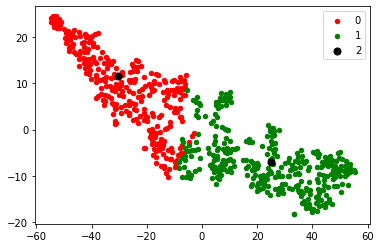

Starting epoch 451:
[451|1] loss: 0.9632, classify: 0.69263,recons: 0.26845, clustering: 0.02073
Starting epoch 452:
[452|1] loss: 0.9631, classify: 0.69282,recons: 0.26818, clustering: 0.02067
Starting epoch 453:
[453|1] loss: 0.9623, classify: 0.69250,recons: 0.26776, clustering: 0.02024
Starting epoch 454:
[454|1] loss: 0.9616, classify: 0.69263,recons: 0.26746, clustering: 0.01535
Starting epoch 455:
[455|1] loss: 0.9616, classify: 0.69219,recons: 0.26740, clustering: 0.02027
Starting epoch 456:
[456|1] loss: 0.9623, classify: 0.69275,recons: 0.26752, clustering: 0.02002
Starting epoch 457:
[457|1] loss: 0.9622, classify: 0.69258,recons: 0.26770, clustering: 0.01960
Starting epoch 458:
[458|1] loss: 0.9618, classify: 0.69237,recons: 0.26780, clustering: 0.01651
Starting epoch 459:
[459|1] loss: 0.9622, classify: 0.69242,recons: 0.26780, clustering: 0.01968
Starting epoch 460:
[460|1] loss: 0.9620, classify: 0.69248,recons: 0.26763, clustering: 0.01933
Starting epoch 461:
[461|1] lo

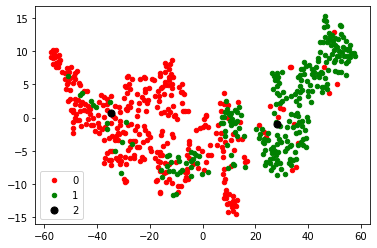

Plot with predicted labels (for kmeans and tsne sanity):


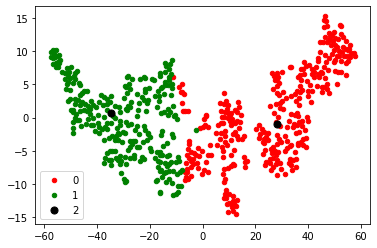

Starting epoch 501:
[501|1] loss: 0.9609, classify: 0.69286,recons: 0.26662, clustering: 0.01413
Starting epoch 502:
[502|1] loss: 0.9607, classify: 0.69244,recons: 0.26664, clustering: 0.01578
Starting epoch 503:
[503|1] loss: 0.9608, classify: 0.69255,recons: 0.26668, clustering: 0.01579
Starting epoch 504:
[504|1] loss: 0.9608, classify: 0.69257,recons: 0.26675, clustering: 0.01513
Starting epoch 505:
[505|1] loss: 0.9608, classify: 0.69239,recons: 0.26684, clustering: 0.01531
Starting epoch 506:
[506|1] loss: 0.9615, classify: 0.69301,recons: 0.26700, clustering: 0.01481
Starting epoch 507:
[507|1] loss: 0.9616, classify: 0.69290,recons: 0.26719, clustering: 0.01538
Starting epoch 508:
[508|1] loss: 0.9618, classify: 0.69278,recons: 0.26753, clustering: 0.01451
Starting epoch 509:
[509|1] loss: 0.9623, classify: 0.69285,recons: 0.26794, clustering: 0.01469
Starting epoch 510:
[510|1] loss: 0.9623, classify: 0.69242,recons: 0.26864, clustering: 0.01261
Starting epoch 511:
[511|1] lo

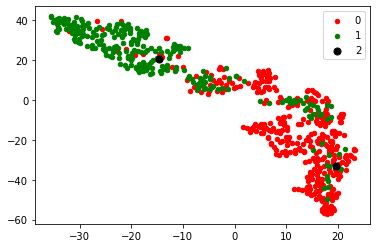

Plot with predicted labels (for kmeans and tsne sanity):


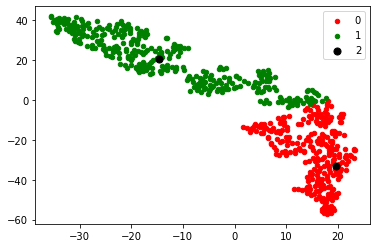

Starting epoch 551:
[551|1] loss: 0.9598, classify: 0.69245,recons: 0.26595, clustering: 0.01351
Starting epoch 552:
[552|1] loss: 0.9603, classify: 0.69295,recons: 0.26595, clustering: 0.01353
Starting epoch 553:
[553|1] loss: 0.9601, classify: 0.69283,recons: 0.26598, clustering: 0.01289
Starting epoch 554:
[554|1] loss: 0.9599, classify: 0.69269,recons: 0.26601, clustering: 0.01160
Starting epoch 555:
[555|1] loss: 0.9601, classify: 0.69282,recons: 0.26604, clustering: 0.01249
Starting epoch 556:
[556|1] loss: 0.9597, classify: 0.69249,recons: 0.26605, clustering: 0.01204
Starting epoch 557:
[557|1] loss: 0.9598, classify: 0.69246,recons: 0.26604, clustering: 0.01252
Starting epoch 558:
[558|1] loss: 0.9602, classify: 0.69288,recons: 0.26602, clustering: 0.01281
Starting epoch 559:
[559|1] loss: 0.9596, classify: 0.69233,recons: 0.26598, clustering: 0.01306
Starting epoch 560:
[560|1] loss: 0.9601, classify: 0.69287,recons: 0.26595, clustering: 0.01318
Starting epoch 561:
[561|1] lo

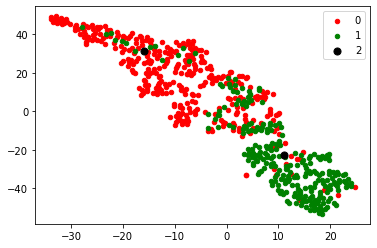

Plot with predicted labels (for kmeans and tsne sanity):


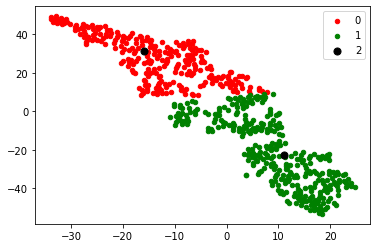

Starting epoch 601:
[601|1] loss: 0.9642, classify: 0.69247,recons: 0.27048, clustering: 0.01260
Starting epoch 602:
[602|1] loss: 0.9650, classify: 0.69239,recons: 0.27131, clustering: 0.01254
Starting epoch 603:
[603|1] loss: 0.9668, classify: 0.69278,recons: 0.27273, clustering: 0.01256
Starting epoch 604:
[604|1] loss: 0.9667, classify: 0.69272,recons: 0.27270, clustering: 0.01244
Starting epoch 605:
[605|1] loss: 0.9669, classify: 0.69272,recons: 0.27295, clustering: 0.01194
Starting epoch 606:
[606|1] loss: 0.9650, classify: 0.69238,recons: 0.27133, clustering: 0.01248
Starting epoch 607:
[607|1] loss: 0.9635, classify: 0.69262,recons: 0.26990, clustering: 0.00944
Starting epoch 608:
[608|1] loss: 0.9619, classify: 0.69276,recons: 0.26787, clustering: 0.01248
Starting epoch 609:
[609|1] loss: 0.9601, classify: 0.69254,recons: 0.26644, clustering: 0.01076
Starting epoch 610:
[610|1] loss: 0.9596, classify: 0.69273,recons: 0.26565, clustering: 0.01188
Starting epoch 611:
[611|1] lo

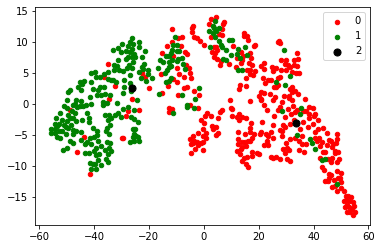

Plot with predicted labels (for kmeans and tsne sanity):


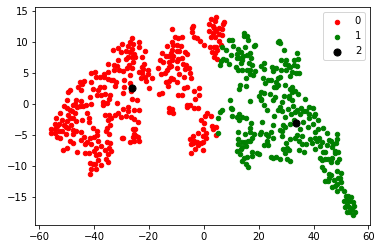

Starting epoch 651:
[651|1] loss: 0.9592, classify: 0.69274,recons: 0.26528, clustering: 0.01215
Starting epoch 652:
[652|1] loss: 0.9588, classify: 0.69237,recons: 0.26525, clustering: 0.01139
Starting epoch 653:
[653|1] loss: 0.9589, classify: 0.69249,recons: 0.26524, clustering: 0.01202
Starting epoch 654:
[654|1] loss: 0.9589, classify: 0.69260,recons: 0.26523, clustering: 0.01110
Starting epoch 655:
[655|1] loss: 0.9590, classify: 0.69259,recons: 0.26522, clustering: 0.01204
Starting epoch 656:
[656|1] loss: 0.9591, classify: 0.69265,recons: 0.26521, clustering: 0.01201
Starting epoch 657:
[657|1] loss: 0.9585, classify: 0.69233,recons: 0.26521, clustering: 0.00955
Starting epoch 658:
[658|1] loss: 0.9590, classify: 0.69261,recons: 0.26521, clustering: 0.01192
Starting epoch 659:
[659|1] loss: 0.9588, classify: 0.69283,recons: 0.26521, clustering: 0.00790
Starting epoch 660:
[660|1] loss: 0.9591, classify: 0.69266,recons: 0.26520, clustering: 0.01214
Starting epoch 661:
[661|1] lo

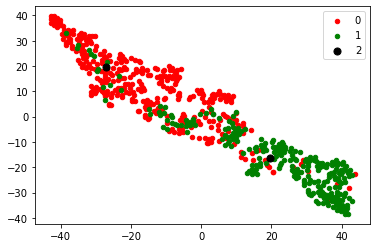

Plot with predicted labels (for kmeans and tsne sanity):


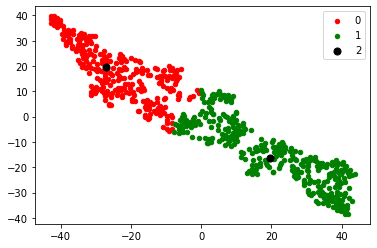

Starting epoch 701:
[701|1] loss: 0.9622, classify: 0.69264,recons: 0.26829, clustering: 0.01278
Starting epoch 702:
[702|1] loss: 0.9607, classify: 0.69274,recons: 0.26667, clustering: 0.01286
Starting epoch 703:
[703|1] loss: 0.9596, classify: 0.69293,recons: 0.26540, clustering: 0.01259
Starting epoch 704:
[704|1] loss: 0.9587, classify: 0.69264,recons: 0.26487, clustering: 0.01213
Starting epoch 705:
[705|1] loss: 0.9588, classify: 0.69260,recons: 0.26501, clustering: 0.01191
Starting epoch 706:
[706|1] loss: 0.9595, classify: 0.69264,recons: 0.26558, clustering: 0.01259
Starting epoch 707:
[707|1] loss: 0.9601, classify: 0.69255,recons: 0.26629, clustering: 0.01267
Starting epoch 708:
[708|1] loss: 0.9607, classify: 0.69276,recons: 0.26671, clustering: 0.01262
Starting epoch 709:
[709|1] loss: 0.9607, classify: 0.69260,recons: 0.26686, clustering: 0.01282
Starting epoch 710:
[710|1] loss: 0.9602, classify: 0.69241,recons: 0.26645, clustering: 0.01283
Starting epoch 711:
[711|1] lo

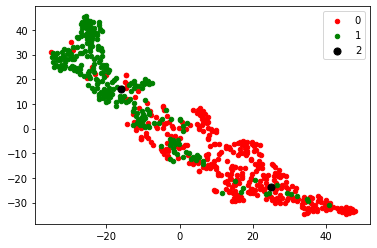

Plot with predicted labels (for kmeans and tsne sanity):


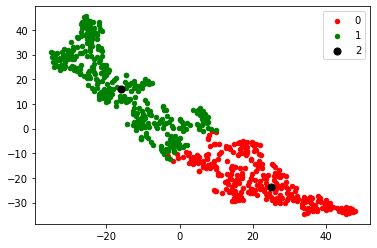

Starting epoch 751:
[751|1] loss: 0.9585, classify: 0.69275,recons: 0.26446, clustering: 0.01289
Starting epoch 752:
[752|1] loss: 0.9584, classify: 0.69272,recons: 0.26446, clustering: 0.01229
Starting epoch 753:
[753|1] loss: 0.9580, classify: 0.69234,recons: 0.26445, clustering: 0.01226
Starting epoch 754:
[754|1] loss: 0.9582, classify: 0.69236,recons: 0.26444, clustering: 0.01368
Starting epoch 755:
[755|1] loss: 0.9583, classify: 0.69252,recons: 0.26443, clustering: 0.01366
Starting epoch 756:
[756|1] loss: 0.9585, classify: 0.69275,recons: 0.26442, clustering: 0.01322
Starting epoch 757:
[757|1] loss: 0.9586, classify: 0.69289,recons: 0.26440, clustering: 0.01336
Starting epoch 758:
[758|1] loss: 0.9585, classify: 0.69274,recons: 0.26439, clustering: 0.01342
Starting epoch 759:
[759|1] loss: 0.9586, classify: 0.69285,recons: 0.26438, clustering: 0.01364
Starting epoch 760:
[760|1] loss: 0.9582, classify: 0.69247,recons: 0.26437, clustering: 0.01317
Starting epoch 761:
[761|1] lo

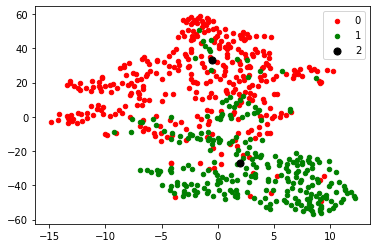

Plot with predicted labels (for kmeans and tsne sanity):


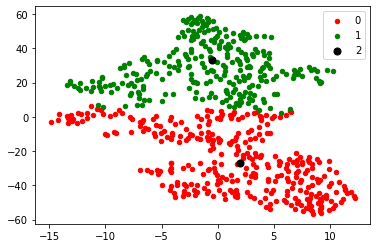

Starting epoch 801:
[801|1] loss: 0.9659, classify: 0.69275,recons: 0.27178, clustering: 0.01381
Starting epoch 802:
[802|1] loss: 0.9637, classify: 0.69266,recons: 0.26975, clustering: 0.01337
Starting epoch 803:
[803|1] loss: 0.9606, classify: 0.69250,recons: 0.26678, clustering: 0.01331
Starting epoch 804:
[804|1] loss: 0.9589, classify: 0.69272,recons: 0.26481, clustering: 0.01383
Starting epoch 805:
[805|1] loss: 0.9576, classify: 0.69218,recons: 0.26397, clustering: 0.01406
Starting epoch 806:
[806|1] loss: 0.9585, classify: 0.69272,recons: 0.26430, clustering: 0.01467
Starting epoch 807:
[807|1] loss: 0.9595, classify: 0.69266,recons: 0.26535, clustering: 0.01510
Starting epoch 808:
[808|1] loss: 0.9605, classify: 0.69264,recons: 0.26634, clustering: 0.01492
Starting epoch 809:
[809|1] loss: 0.9607, classify: 0.69238,recons: 0.26694, clustering: 0.01357
Starting epoch 810:
[810|1] loss: 0.9601, classify: 0.69236,recons: 0.26646, clustering: 0.01328
Starting epoch 811:
[811|1] lo

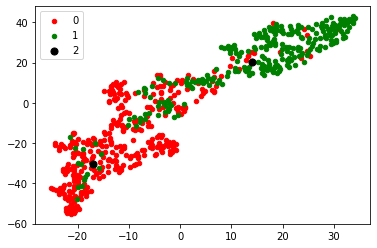

Plot with predicted labels (for kmeans and tsne sanity):


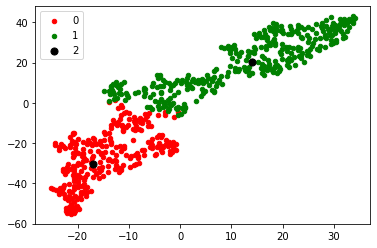

Starting epoch 851:
[851|1] loss: 0.9577, classify: 0.69265,recons: 0.26337, clustering: 0.01729
Starting epoch 852:
[852|1] loss: 0.9573, classify: 0.69252,recons: 0.26337, clustering: 0.01392
Starting epoch 853:
[853|1] loss: 0.9573, classify: 0.69225,recons: 0.26336, clustering: 0.01696
Starting epoch 854:
[854|1] loss: 0.9568, classify: 0.69199,recons: 0.26334, clustering: 0.01445
Starting epoch 855:
[855|1] loss: 0.9571, classify: 0.69208,recons: 0.26332, clustering: 0.01662
Starting epoch 856:
[856|1] loss: 0.9571, classify: 0.69253,recons: 0.26329, clustering: 0.01304
Starting epoch 857:
[857|1] loss: 0.9573, classify: 0.69233,recons: 0.26327, clustering: 0.01725
Starting epoch 858:
[858|1] loss: 0.9572, classify: 0.69237,recons: 0.26324, clustering: 0.01553
Starting epoch 859:
[859|1] loss: 0.9576, classify: 0.69260,recons: 0.26322, clustering: 0.01743
Starting epoch 860:
[860|1] loss: 0.9574, classify: 0.69242,recons: 0.26321, clustering: 0.01781
Starting epoch 861:
[861|1] lo

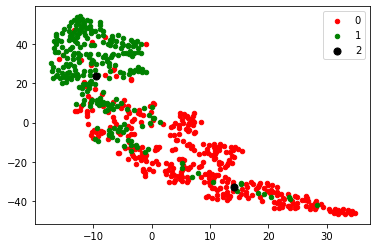

Plot with predicted labels (for kmeans and tsne sanity):


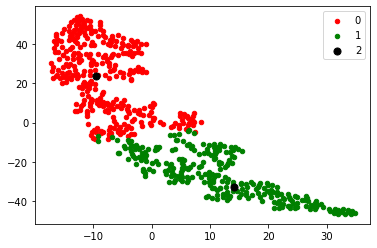

Starting epoch 901:
[901|1] loss: 0.9571, classify: 0.69268,recons: 0.26245, clustering: 0.01997
Starting epoch 902:
[902|1] loss: 0.9567, classify: 0.69221,recons: 0.26246, clustering: 0.02067
Starting epoch 903:
[903|1] loss: 0.9569, classify: 0.69231,recons: 0.26250, clustering: 0.02128
Starting epoch 904:
[904|1] loss: 0.9565, classify: 0.69232,recons: 0.26257, clustering: 0.01611
Starting epoch 905:
[905|1] loss: 0.9575, classify: 0.69271,recons: 0.26274, clustering: 0.02081
Starting epoch 906:
[906|1] loss: 0.9579, classify: 0.69267,recons: 0.26304, clustering: 0.02171
Starting epoch 907:
[907|1] loss: 0.9581, classify: 0.69246,recons: 0.26367, clustering: 0.01944
Starting epoch 908:
[908|1] loss: 0.9595, classify: 0.69263,recons: 0.26474, clustering: 0.02149
Starting epoch 909:
[909|1] loss: 0.9611, classify: 0.69197,recons: 0.26694, clustering: 0.02180
Starting epoch 910:
[910|1] loss: 0.9642, classify: 0.69205,recons: 0.27016, clustering: 0.02021
Starting epoch 911:
[911|1] lo

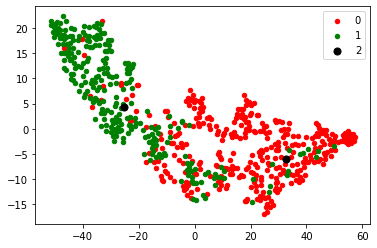

Plot with predicted labels (for kmeans and tsne sanity):


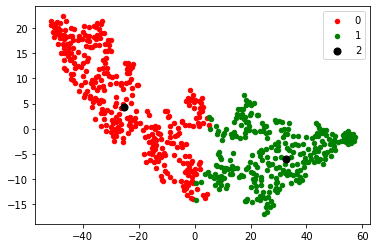

Starting epoch 951:
[951|1] loss: 0.9560, classify: 0.69181,recons: 0.26174, clustering: 0.02436
Starting epoch 952:
[952|1] loss: 0.9566, classify: 0.69273,recons: 0.26150, clustering: 0.02404
Starting epoch 953:
[953|1] loss: 0.9561, classify: 0.69232,recons: 0.26127, clustering: 0.02546
Starting epoch 954:
[954|1] loss: 0.9551, classify: 0.69174,recons: 0.26124, clustering: 0.02072
Starting epoch 955:
[955|1] loss: 0.9563, classify: 0.69233,recons: 0.26135, clustering: 0.02590
Starting epoch 956:
[956|1] loss: 0.9556, classify: 0.69168,recons: 0.26140, clustering: 0.02515
Starting epoch 957:
[957|1] loss: 0.9563, classify: 0.69251,recons: 0.26129, clustering: 0.02544
Starting epoch 958:
[958|1] loss: 0.9558, classify: 0.69205,recons: 0.26112, clustering: 0.02624
Starting epoch 959:
[959|1] loss: 0.9561, classify: 0.69261,recons: 0.26101, clustering: 0.02466
Starting epoch 960:
[960|1] loss: 0.9554, classify: 0.69213,recons: 0.26101, clustering: 0.02231
Starting epoch 961:
[961|1] lo

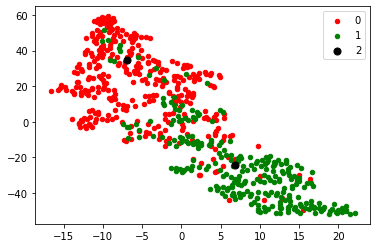

Plot with predicted labels (for kmeans and tsne sanity):


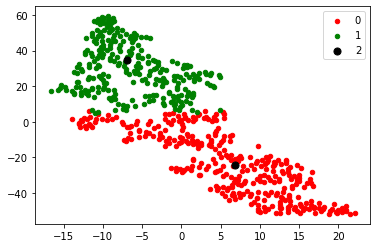

In [5]:
epochs = 1000
for epoch in range(dtcr_model._training_iteration, epochs):
    print("Starting epoch {}:".format(epoch + 1))
    dtcr_model.train_step(train_dl, test_dl, recons_criterion, classify_criterion,
                          optimizer)